# Exploratory statistics : looking beyond the image

Authors: 
- [Médéric FOURMY](https://github.com/MedericFourmy)
- [Nikola LOHINSKI](https://github.com/NikolaLohinski)

<div class="alert alert-info">
In this notebook you will learn how to :
<ul>
<li>[🔗]()
<li>[🔗]()
<li>[🔗]()
<li>[🔗]()
<li>[🔗]()
</ul>
</div>

<div class="alert alert-warning">
To run this R-notebook you will need :
<ul>
<li> To have the packages `pixmap`, `corrplot` and `FactoMineR` available. If not, you may run the following cell to install them.
</ul>
</div>


In [ ]:
installed.packages(c('pixmap', 'corrplot', 'FactoMineR'))

Let's start by loading all the packages :

In [5]:
library(pixmap)
library(corrplot)
library(FactoMineR)

# 1 The image

Several images are available along this notebook in the repository. You may play and test them all, but the analysis and the content of this work was done with a specific picture of a cat, sitting nicely on a pizza ... in space. Let's take a look at it and load in `R` for further treatment.

Warning message in rep(cellres, length = 2):
“'x' is NULL so the result will be NULL”

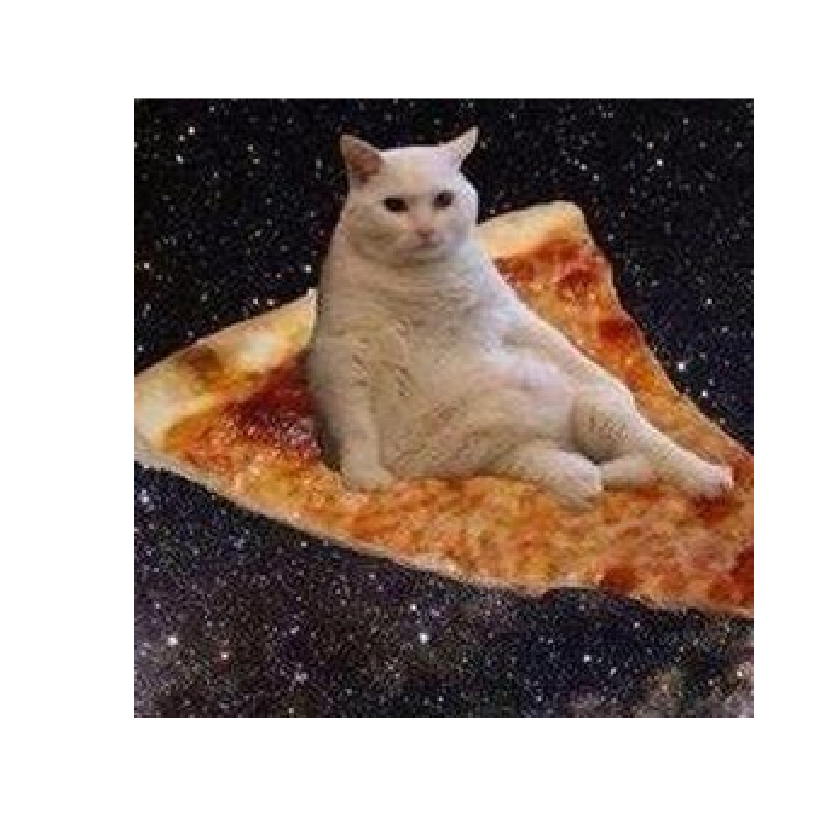

In [11]:
image_path <- 'Data/cat.ppm'

picture <- read.pnm(image_path)

plot(picture)

We will call the cat **Felix**, for no specific reason, and before beginning the analysis, we can already say a few things about it :
- The cat is obviously white, the pizza of a reddish-orange and the space black with faints of purple.
- The picture is (obviously) not a real picture, but was handcrafted by adding the cat on the pizza, and then putting both of them in a space like background. However, a certain effort was put in the combination of colors to mix everything together.
Those two remarks may sound/look stupid but they will come back a little bit later and it is important to keep in mind what we are dealing with, and in this case, a _pizzastrocat_.

## 2 Color distribution

Let's take a look at the color distribution keeping in mind the first remark :

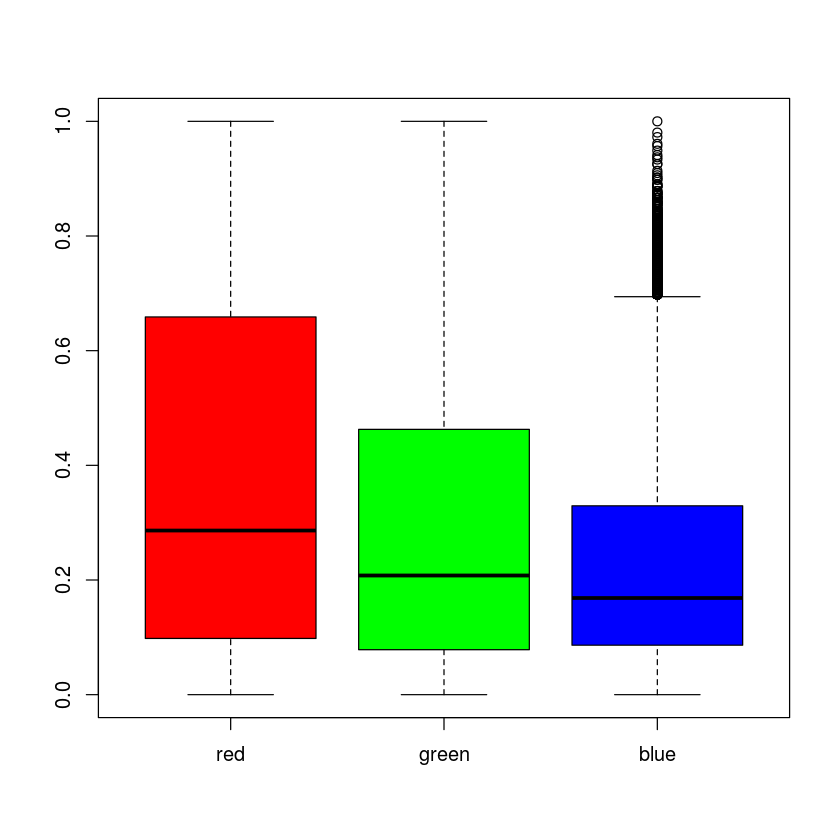

In [13]:
colors <- data.frame(
    red=as.vector(picture@red),
    green=as.vector(picture@green),
    blue=as.vector(picture@blue)
)
boxplot(colors, col=c('red', 'green', 'blue'))

The picture is pretty dark, and the pizza is very red and takes a lot of space in it, which is coherent with thos values. there still are a lot of blue out layers : are they related to the space, or the cat somehow ? Where is the cat in this distribution ? A big white cat should pull the distributions towards 1.0, but the darkness is stronger. In fact, even if Felix _looks white_, he is not white. Let's take a closer look by plotting the density plots :

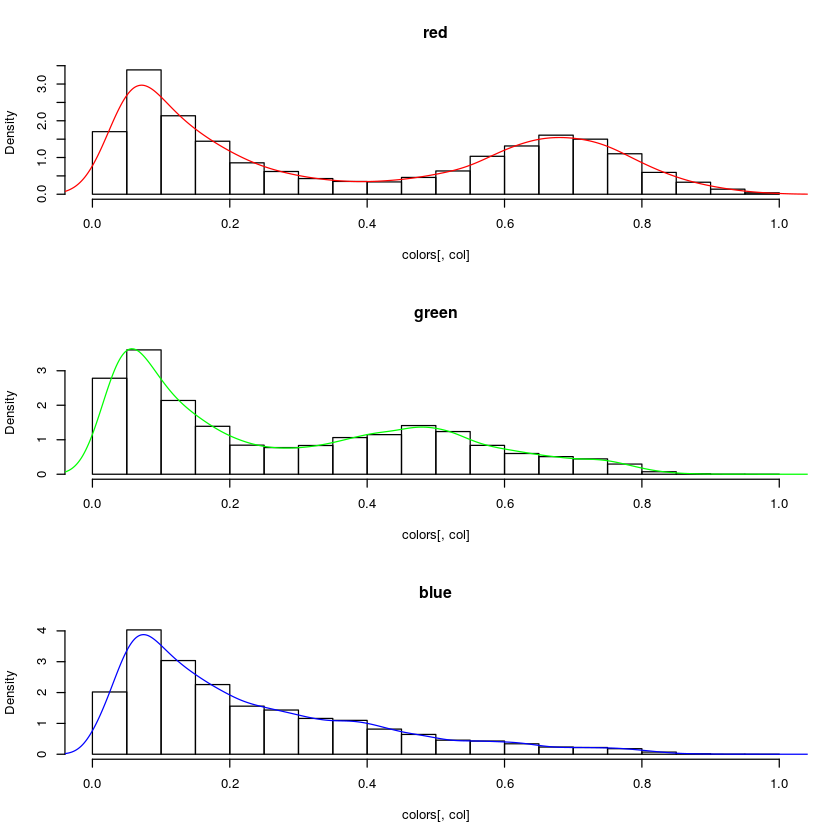

In [31]:
par(mfrow=c(3, 1))
for (col in c('red', 'green', 'blue')) {
    hist(colors[,col], freq=F, main=col)
    lines(density(colors[,col]), col=col)
}

Nothing new here but the fact that there is almost nothing white in the picture, but some bright red dots, and some greenish-